In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Electric_Vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [4]:
df.describe()

Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1254.000000   
mean                74.534692              42.642894   
std                 20.626914              22.411705   
min                  1.532807               0.045772   
25%                 62.000000              23.881193   
50%                 75.000000              42.691405   
75%                 85.000000              61.206218   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1254.000000          1320.000000   
mean                    2.269377           25.963003            22.551352   
std                     1.061037           14.011326            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           13.856583            13.368141   
50%                     2.258136           25.603799            22.076360   
75%                     3.112806           37.502998            31.646044   
max                     7.635145           97.342255            69.407743   

       State of Charge (Start %)  State of Charge (End %)  \
count                1320.000000              1320.000000   
mean                   49.130012                75.141590   
std                    24.074134                17.080580   
min                     2.325959                 7.604224   
25%                    27.786903                62.053266   
50%                    48.241771                75.682496   
75%                    69.277921                88.201370   
max                   152.489761               177.708666   

       Distance Driven (since last charge) (km)  Temperature (°C)  \
count                               1254.000000       1320.000000   
mean                                 153.596788         15.263591   
std                                   86.004987         14.831216   
min                                    0.862361        -10.724770   
25%                                   79.445335          2.800664   
50%                                  152.259867         14.630846   
75%                                  226.073284         27.981810   
max                                  398.364775         73.169588   

       Vehicle Age (years)  
count          1320.000000  
mean              3.612843  
std               2.309824  
min               0.000000  
25%               2.000000  
50%               4.000000  
75%               6.000000  
max              11.688592

70 degree Celcius temperature is ridiculous. Max state of charge (start) and (end) is hitting beyond 100%. 

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


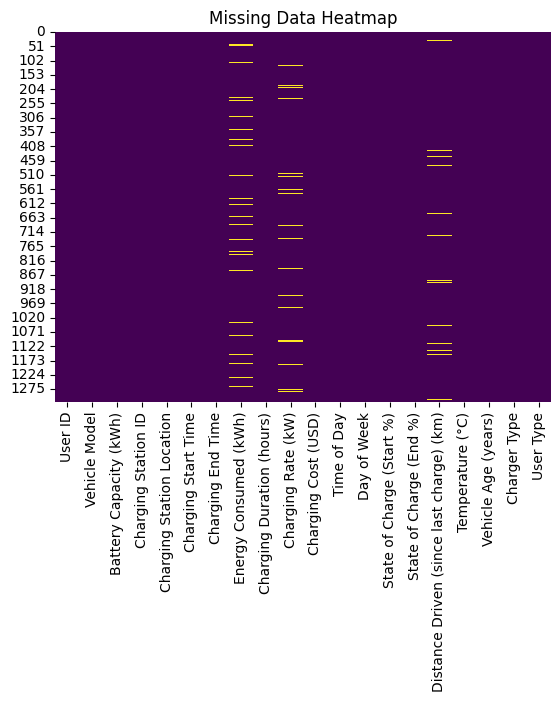

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

plt.figure()
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

No observable weird patterns in how missing data looks. 

In [6]:
#Replace missing values with median
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']] = df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].fillna(df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].median())
df.isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

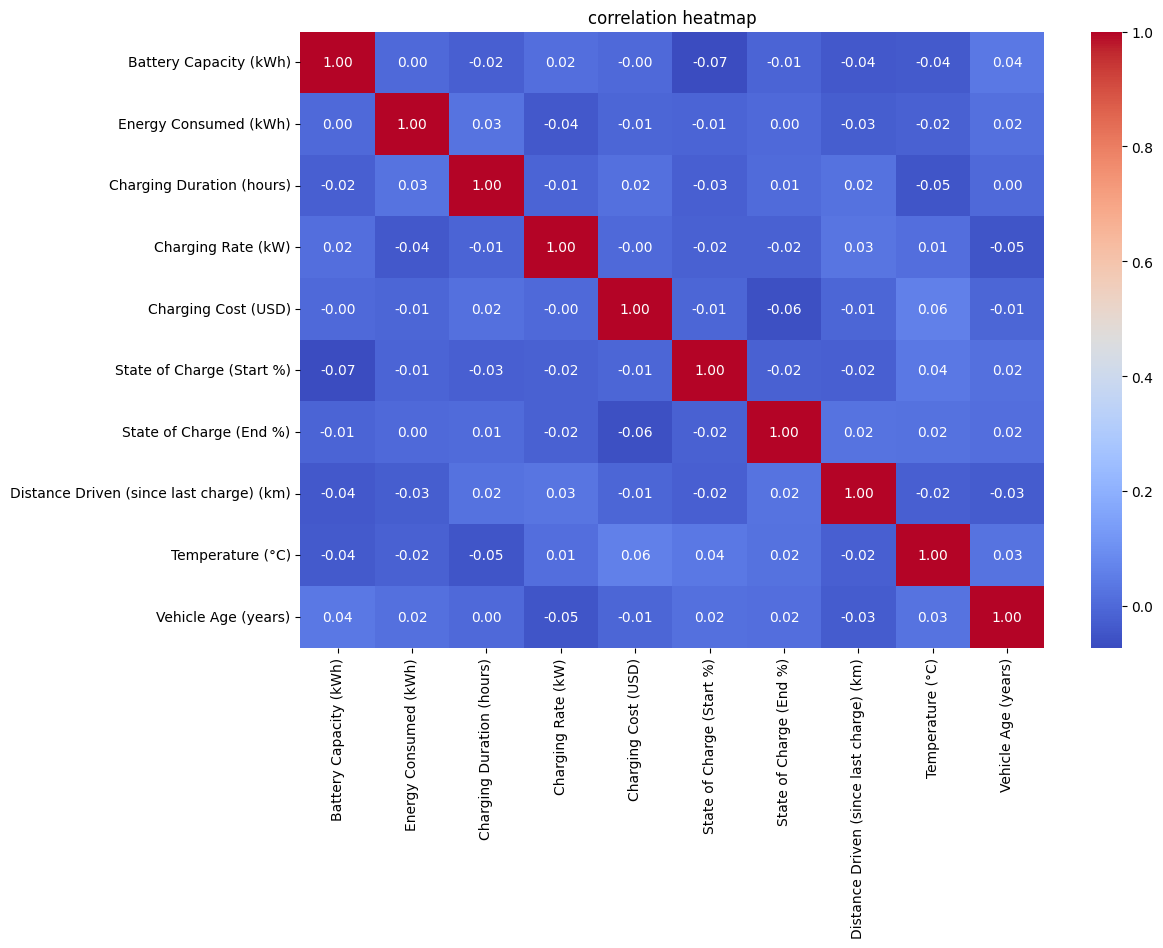

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

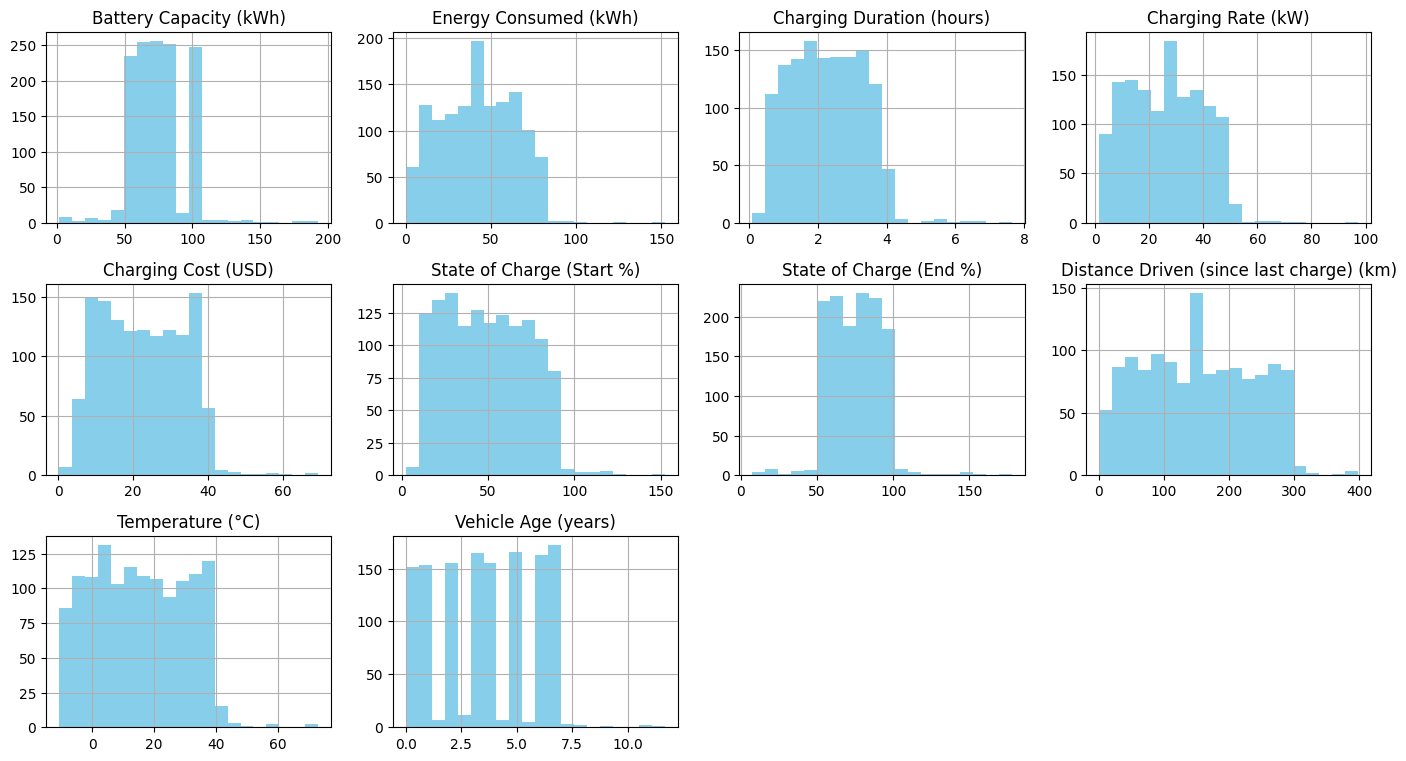

C:\Users\Ysuns\AppData\Local\Temp\ipykernel_61968\947122341.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Charging Cost (USD)'], shade=True)


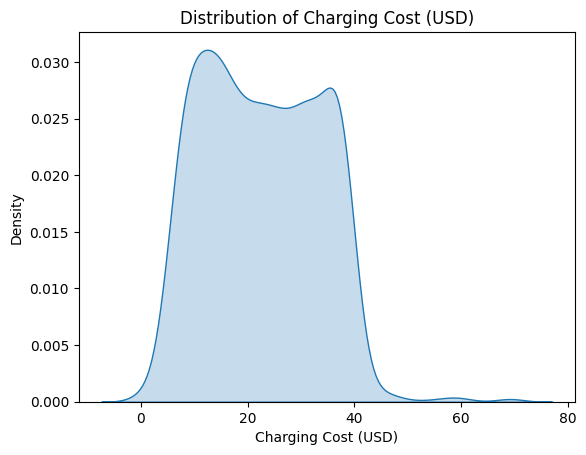

In [8]:
# Plot histograms for numerical features
df.hist(bins=20, figsize=(14, 10), layout=(4, 4), color='skyblue')
plt.tight_layout()
plt.show()

# KDE plots for selected features
sns.kdeplot(df['Charging Cost (USD)'], shade=True)
plt.title('Distribution of Charging Cost (USD)')
plt.show()

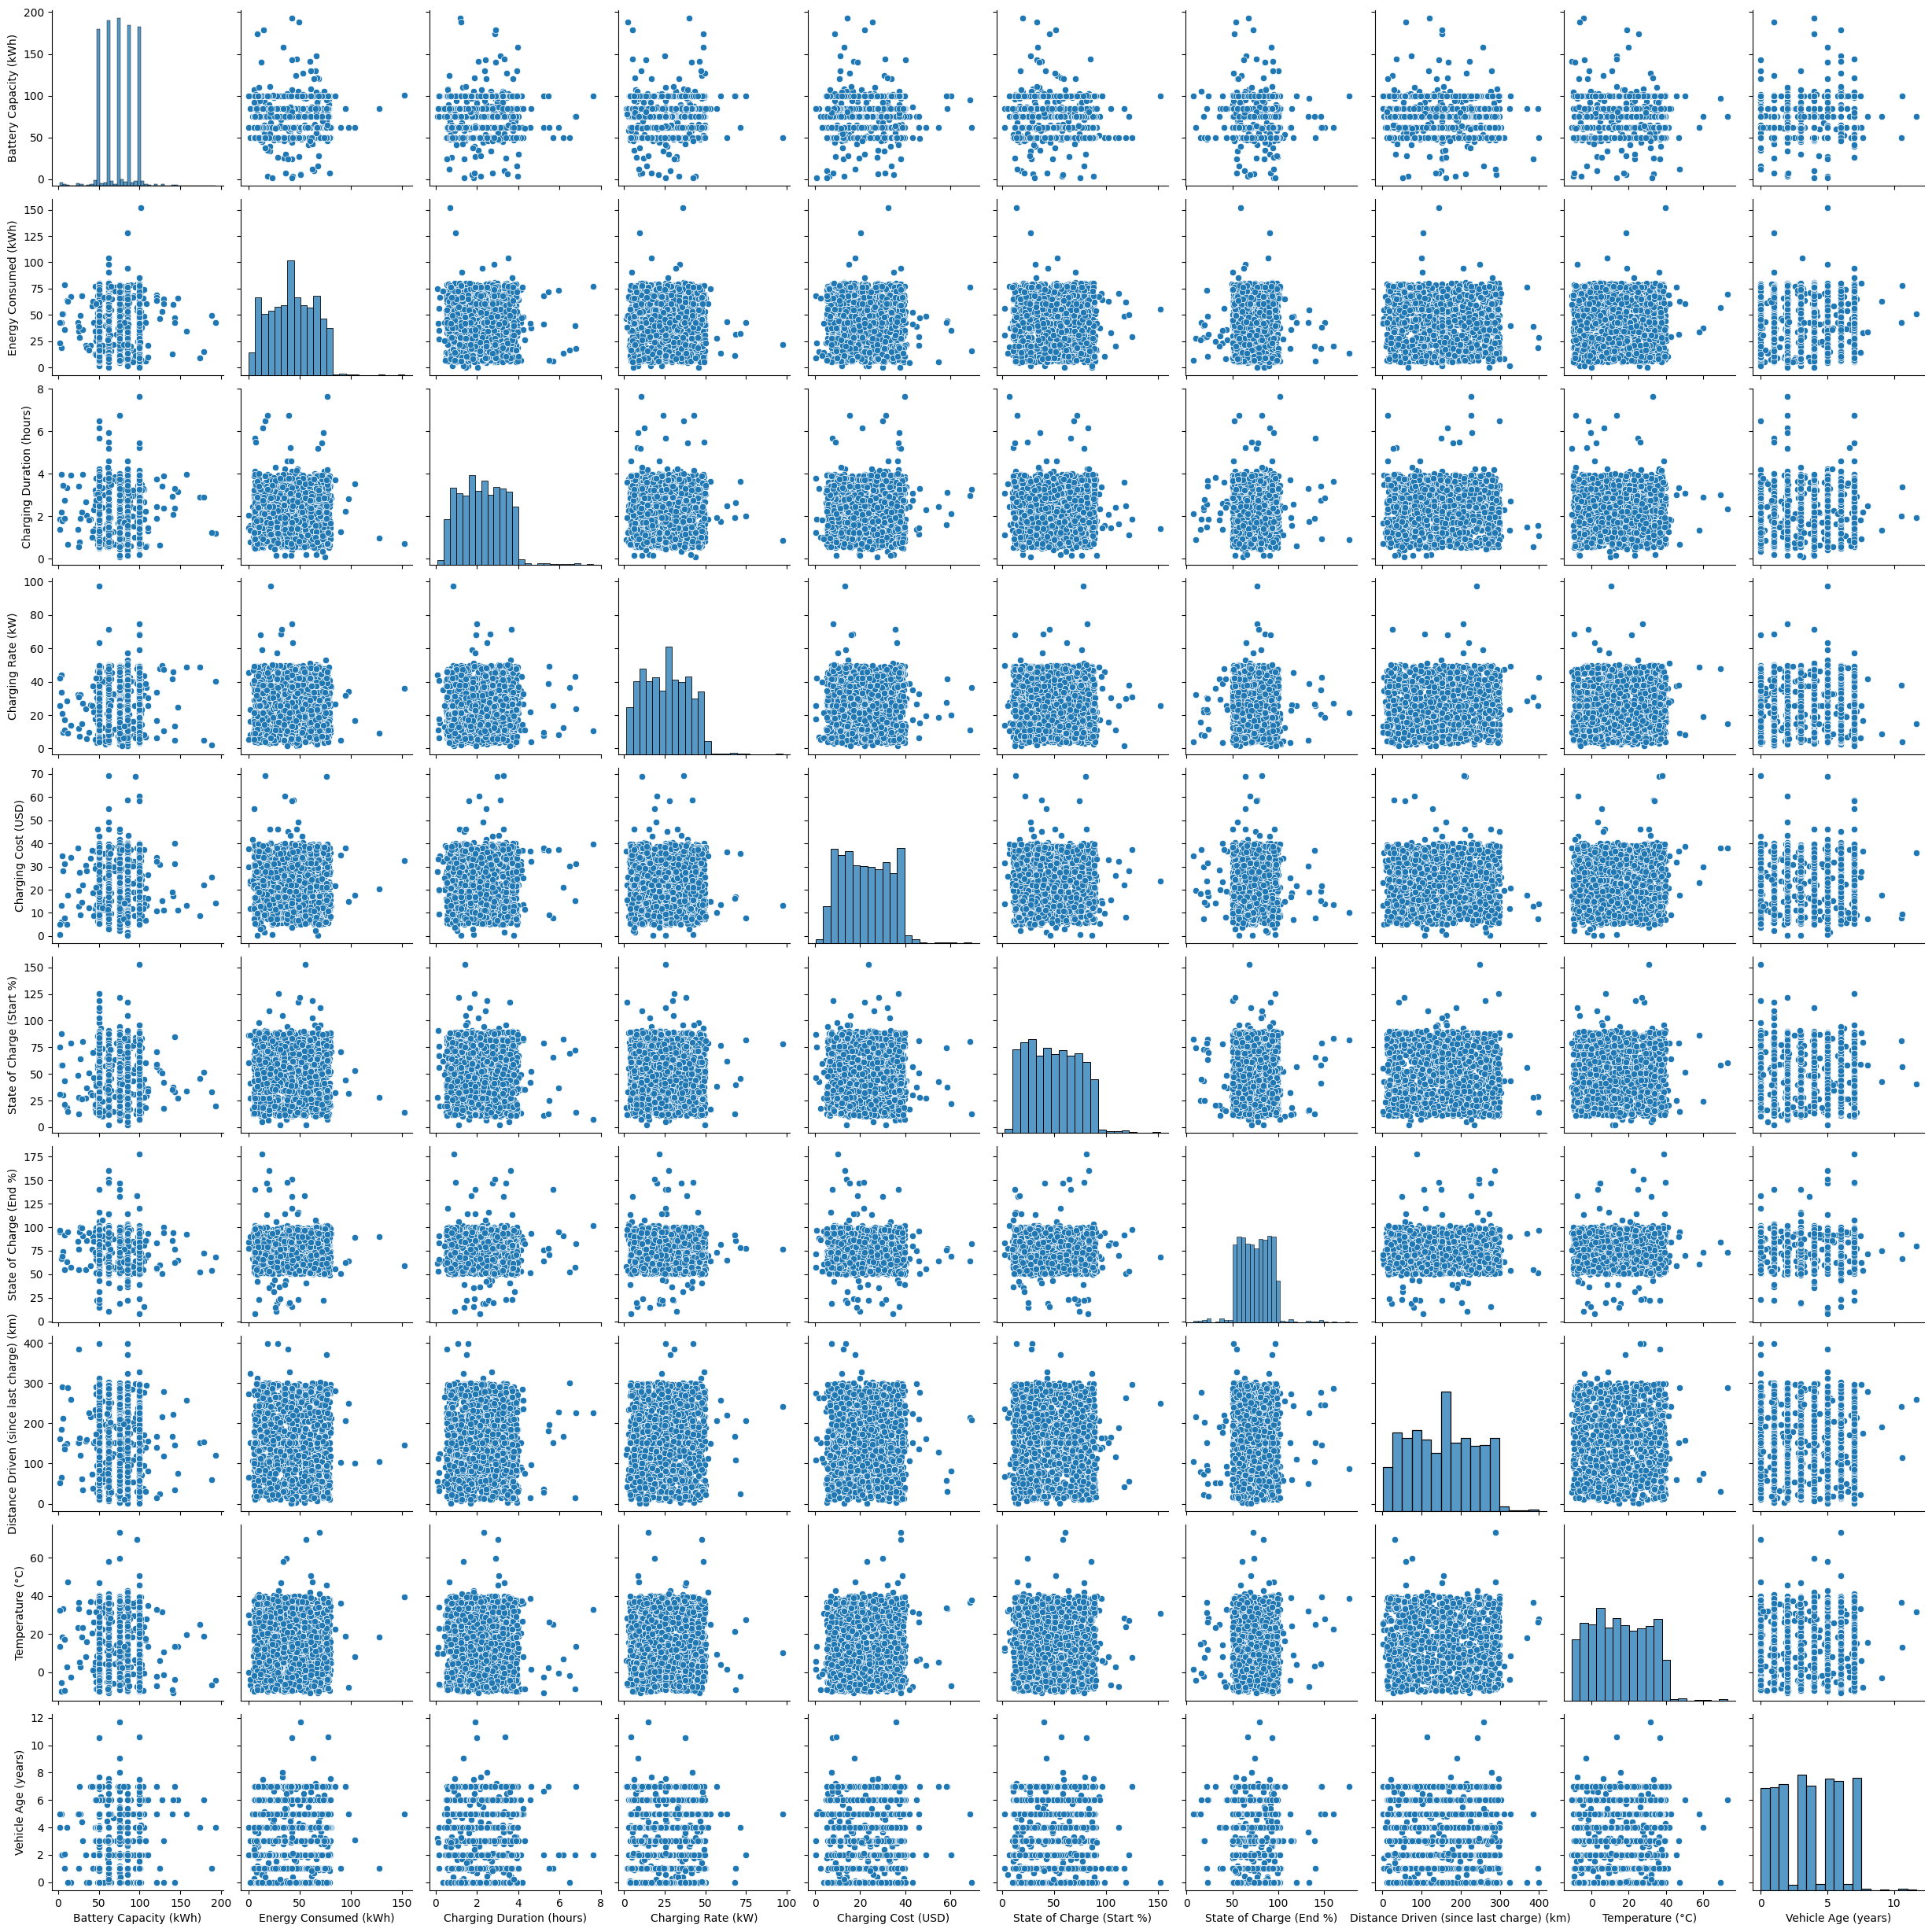

In [9]:
sns.pairplot(df, diag_kind="hist")
plt.show()

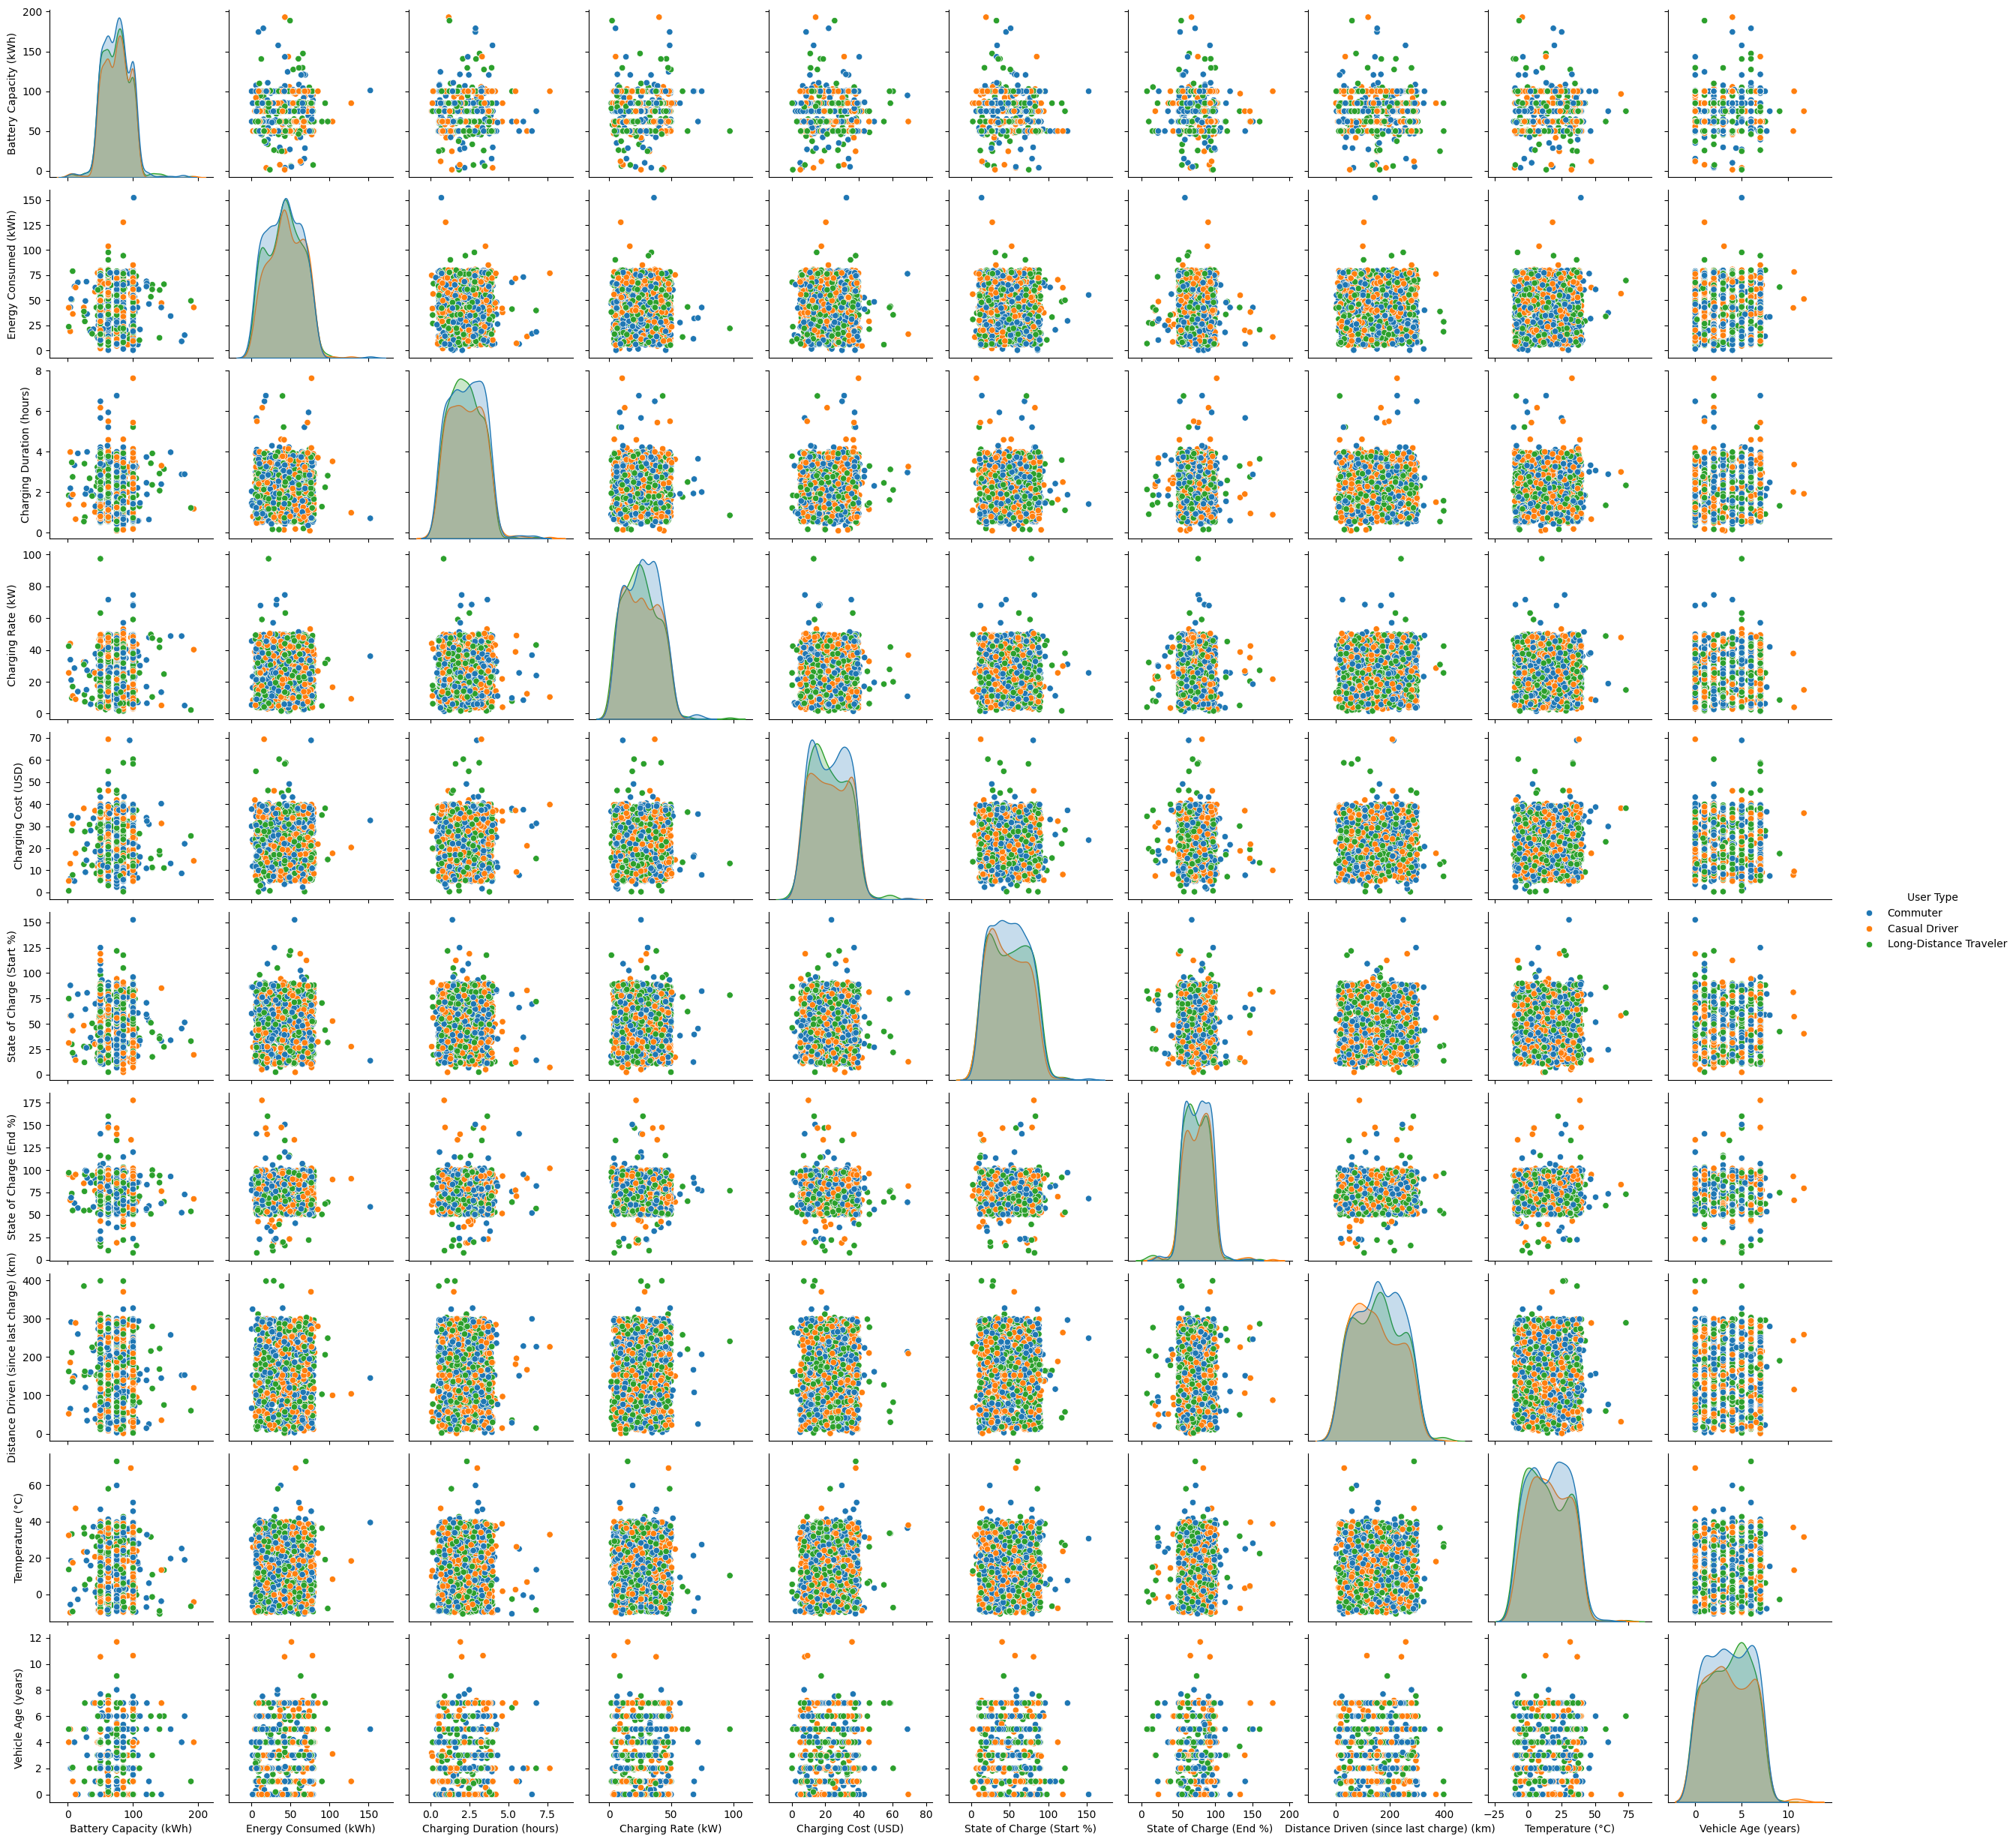

In [10]:
sns.pairplot(df, diag_kind="kde", hue="User Type")
plt.show()

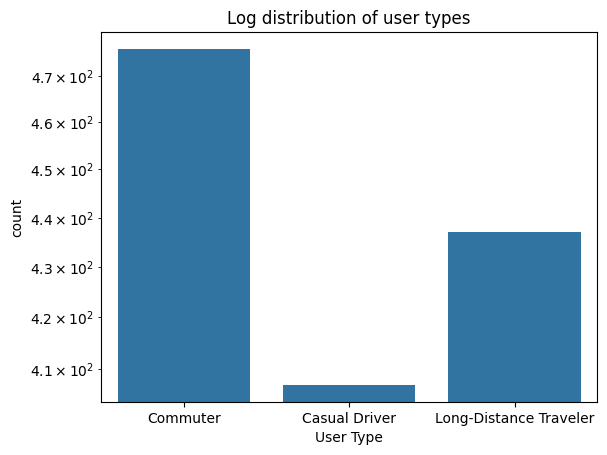

In [11]:
# sns.countplot(x='User Type', data=df)
# plt.title('Distribution of user types')
# plt.show()

sns.countplot(x = 'User Type', data=df)
plt.yscale('log')
plt.title('Log distribution of user types')
plt.show()

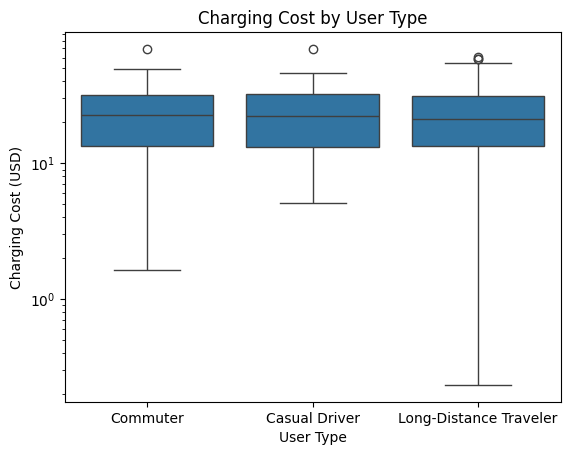

In [12]:
# Distribution of Charging Cost by User Type
sns.boxplot(x='User Type', y='Charging Cost (USD)', data=df)
plt.yscale('log')
plt.title('Charging Cost by User Type')
plt.show()

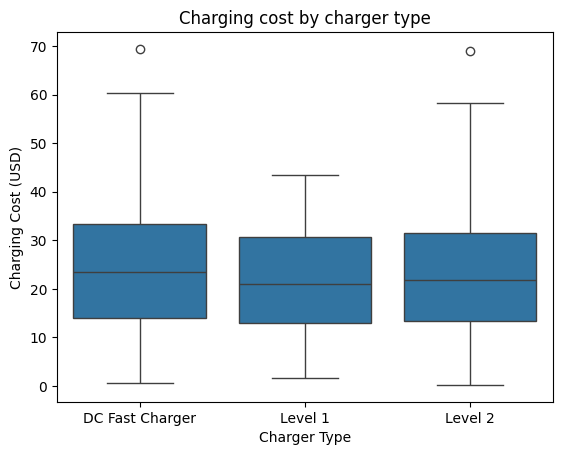

In [13]:
sns.boxplot(x = 'Charger Type', y = 'Charging Cost (USD)', data=df)
plt.title('Charging cost by charger type')
plt.show()

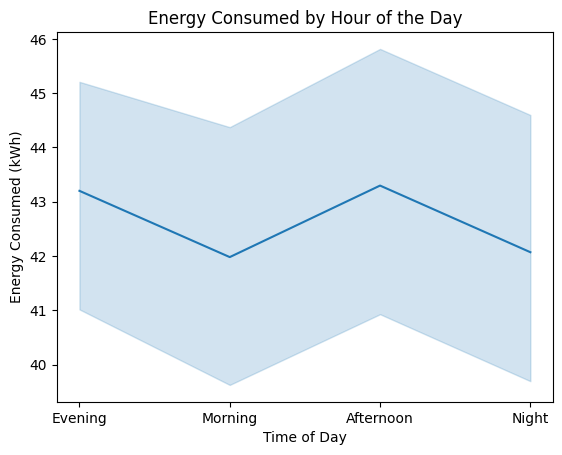

In [14]:
sns.lineplot(x='Time of Day', y='Energy Consumed (kWh)', data=df)
plt.title("Energy Consumed by Hour of the Day")
plt.show()

In [15]:
print(df['Charging Duration (hours)'])

0       0.591363
1       3.133652
2       2.452653
3       1.266431
4       2.019765
          ...   
1315    1.426444
1316    3.238212
1317    3.267122
1318    2.754527
1319    3.740970
Name: Charging Duration (hours), Length: 1320, dtype: float64


In [16]:
#Override charging duration (hours) column with calculated data from Charging Start Time - Charging End Time

df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

df['Charging Duration (hours)'] = (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600

print(df['Charging Duration (hours)'])
print(df[['Charging Start Time', 'Charging End Time', 'Charging Duration (hours)']].head())

0       0.650000
1       2.016667
2       2.800000
3       3.700000
4       1.766667
          ...   
1315    1.500000
1316    0.733333
1317    2.050000
1318    1.333333
1319    0.933333
Name: Charging Duration (hours), Length: 1320, dtype: float64
  Charging Start Time   Charging End Time  Charging Duration (hours)
0 2024-01-01 00:00:00 2024-01-01 00:39:00                   0.650000
1 2024-01-01 01:00:00 2024-01-01 03:01:00                   2.016667
2 2024-01-01 02:00:00 2024-01-01 04:48:00                   2.800000
3 2024-01-01 03:00:00 2024-01-01 06:42:00                   3.700000
4 2024-01-01 04:00:00 2024-01-01 05:46:00                   1.766667


Override of charging duration complete.

In [17]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

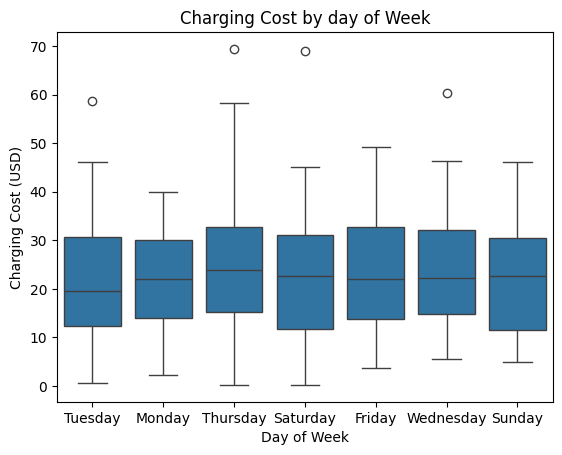

In [18]:
sns.boxplot(x='Day of Week', y='Charging Cost (USD)', data=df)
# plt.yscale('log')
plt.title('Charging Cost by day of Week')
plt.show()

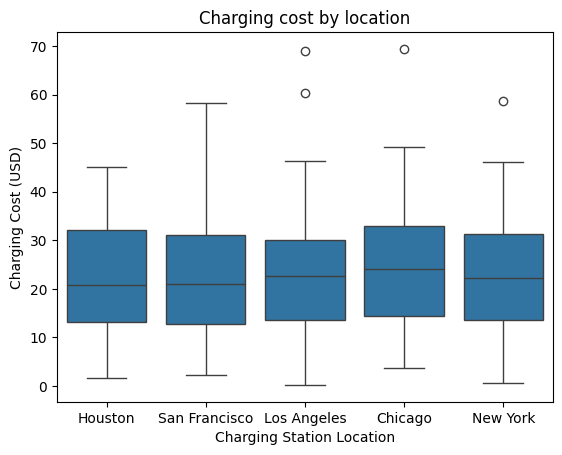

In [19]:
sns.boxplot(x='Charging Station Location', y = 'Charging Cost (USD)', data=df)
plt.title('Charging cost by location')
plt.show()

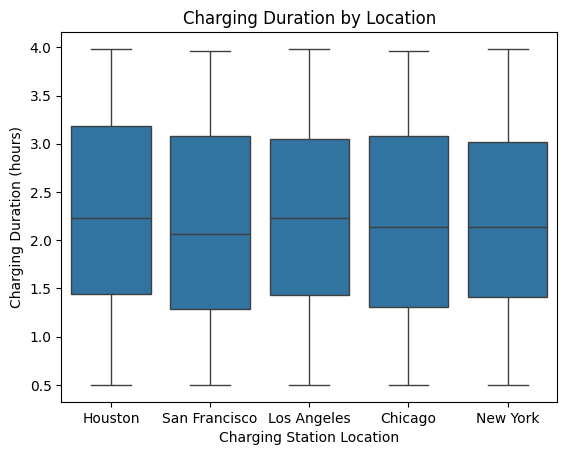

In [20]:
sns.boxplot(x='Charging Station Location', y='Charging Duration (hours)', data=df)
# plt.yscale('log')
plt.title('Charging Duration by Location')
plt.show()

Charging Station Location
Chicago          26.487755
Houston          25.384263
Los Angeles      25.044462
New York         26.135911
San Francisco    26.498841
Name: Charge Efficiency, dtype: float64


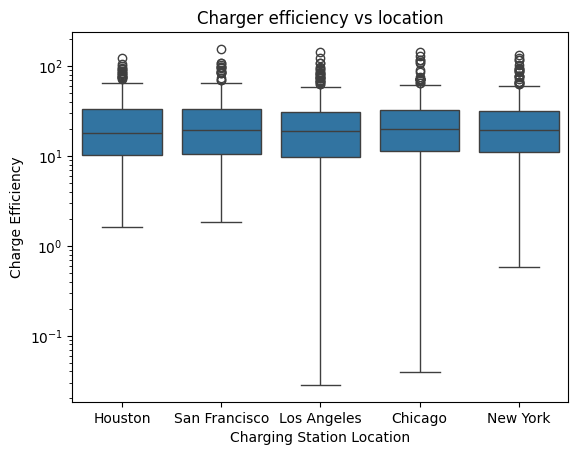

In [21]:
df['Charge Efficiency'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']
city_avg = df.groupby('Charging Station Location')['Charge Efficiency'].mean()
print(city_avg)

sns.boxplot(x = 'Charging Station Location', y = 'Charge Efficiency', data=df)
plt.yscale('log')
plt.title('Charger efficiency vs location')
plt.show()

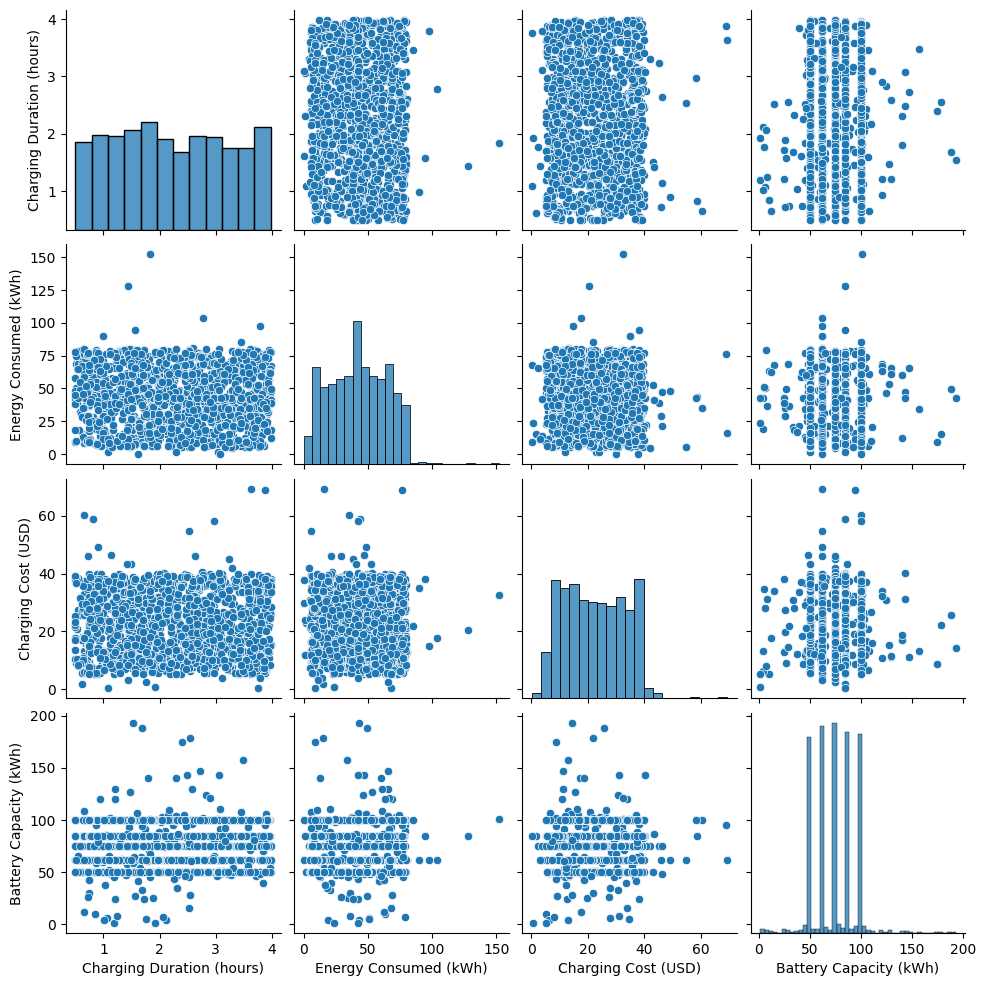

In [22]:
sns.pairplot(df[['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Cost (USD)', 'Battery Capacity (kWh)']])
plt.show()

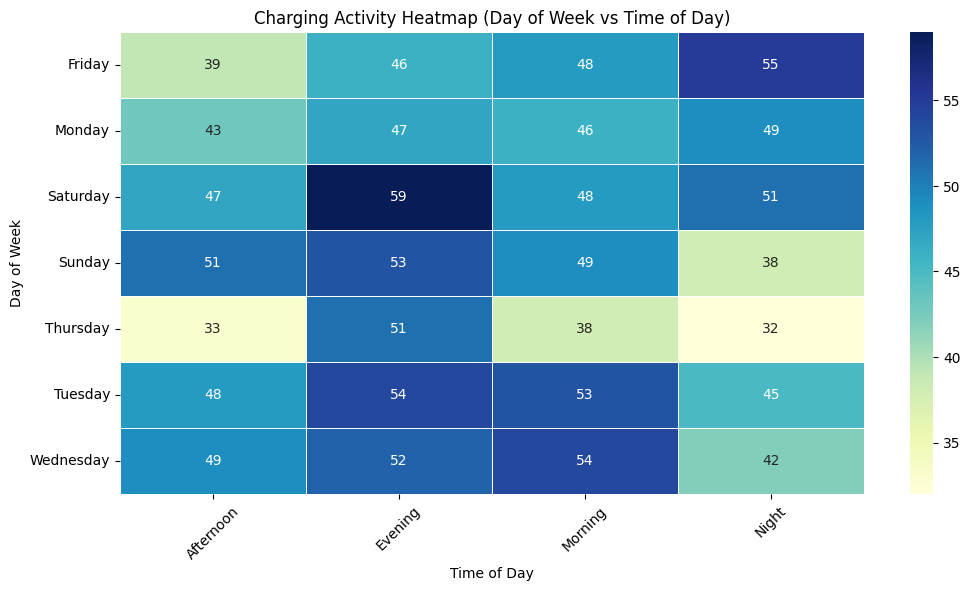

In [23]:
# Create a heatmap to show charging frequency by time of day and day of week
plt.figure(figsize=(12, 6))
heatmap_data = df.groupby(['Day of Week', 'Time of Day']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)

plt.title("Charging Activity Heatmap (Day of Week vs Time of Day)")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

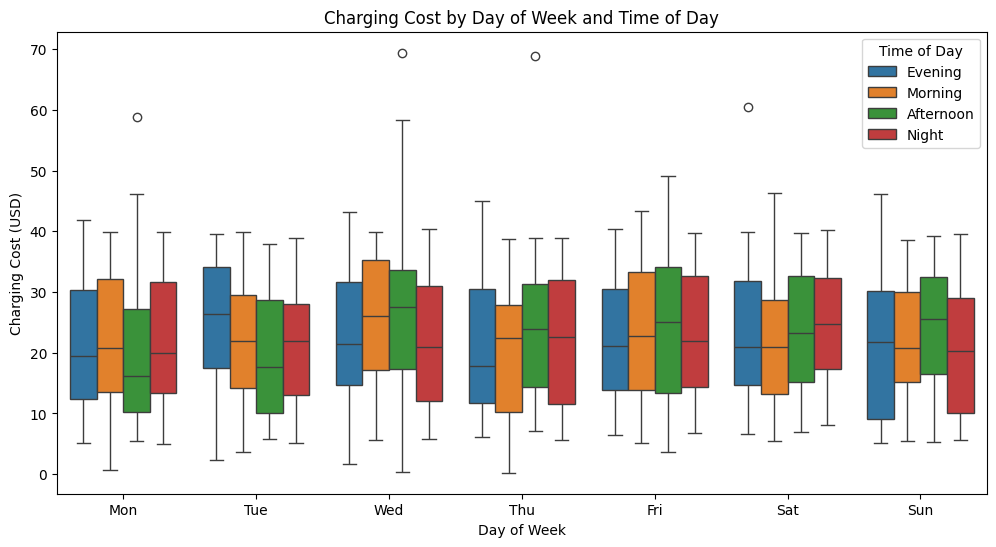

In [24]:
# Boxplot to analyze Charging Cost distribution by Day of Week and Time of Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Charging Cost (USD)', hue='Time of Day', data=df)
plt.title('Charging Cost by Day of Week and Time of Day')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

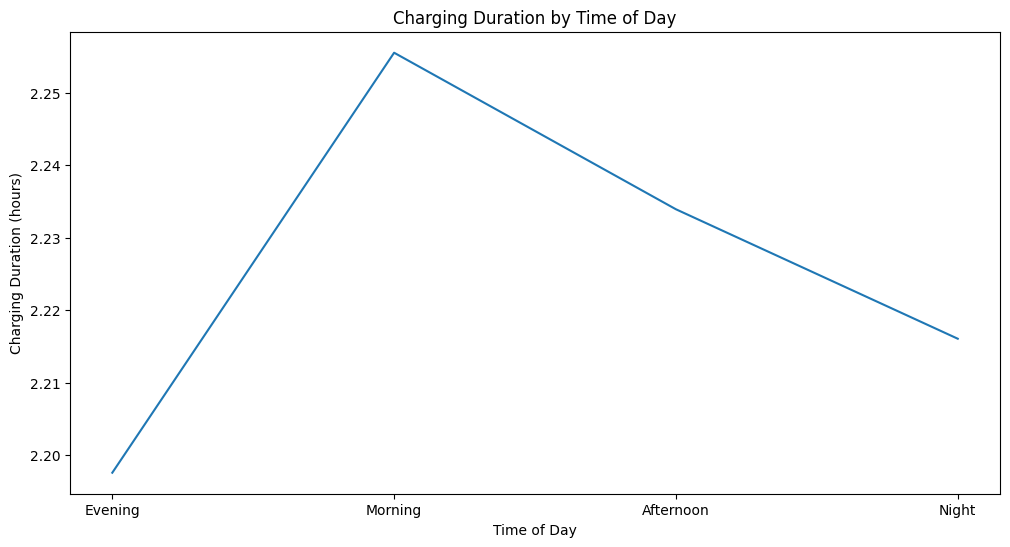

In [25]:
# Lineplot for Charging Duration by Time of Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time of Day', y='Charging Duration (hours)', data=df, errorbar=None)
plt.title('Charging Duration by Time of Day')
plt.show()

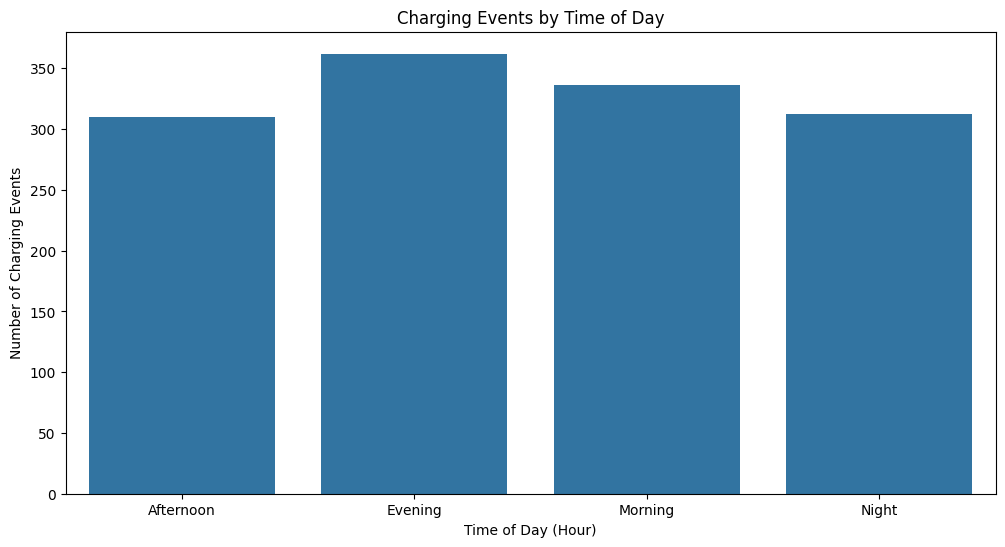

In [26]:
# Group by Time of Day and count occurrences
time_of_day_count = df['Time of Day'].value_counts().sort_index()

# Plot the peak hours
plt.figure(figsize=(12, 6))
sns.barplot(x=time_of_day_count.index, y=time_of_day_count.values)
plt.title('Charging Events by Time of Day')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Number of Charging Events')
plt.show()

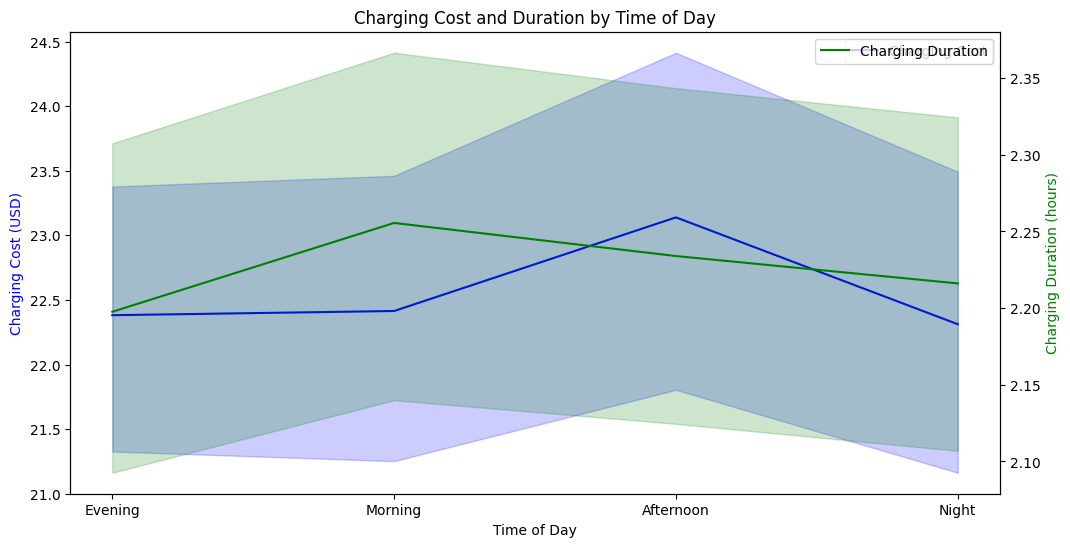

In [27]:
# Overlaying charging cost and duration by time of day
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='Time of Day', y='Charging Cost (USD)', data=df, ax=ax1, color='blue', label="Charging Cost")
ax2 = ax1.twinx()
sns.lineplot(x='Time of Day', y='Charging Duration (hours)', data=df, ax=ax2, color='green', label="Charging Duration")

ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Charging Cost (USD)', color='blue')
ax2.set_ylabel('Charging Duration (hours)', color='green')
plt.title('Charging Cost and Duration by Time of Day')
plt.show()

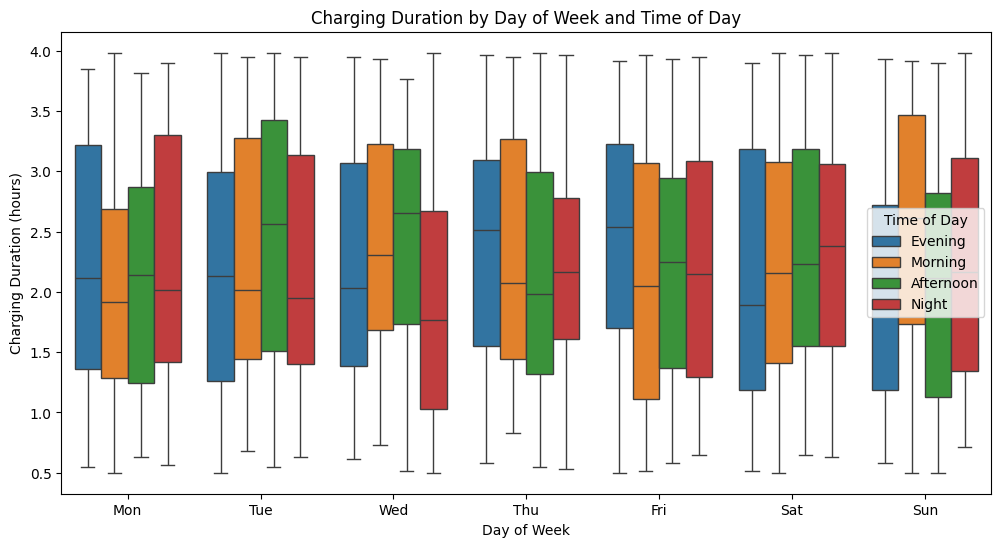

In [28]:
# Compare charging duration by Day of Week and Time of Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Charging Duration (hours)', hue='Time of Day', data=df)
plt.title('Charging Duration by Day of Week and Time of Day')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

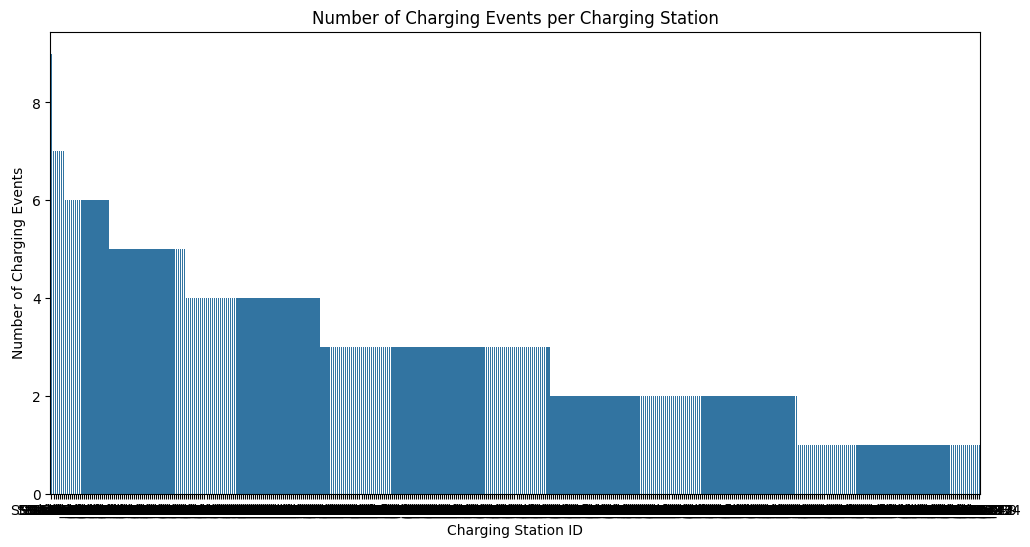

In [29]:
station_usage = df['Charging Station ID'].value_counts().reset_index()
station_usage.columns = ['Charging Station ID', 'Number of Charging Events']

# Plot to visualize usage
plt.figure(figsize=(12, 6))
sns.barplot(x='Charging Station ID', y='Number of Charging Events', data=station_usage)
plt.title('Number of Charging Events per Charging Station')
plt.show()

account for the fact that each charging station ID can be found in many different locations.

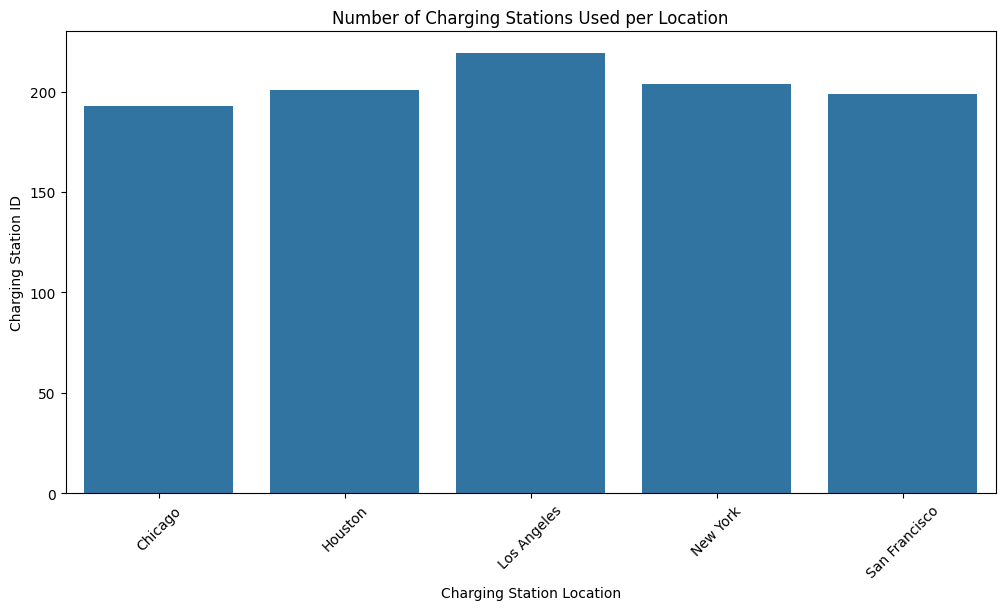

In [30]:
# Calculate usage by location
station_location_usage = df.groupby('Charging Station Location')['Charging Station ID'].nunique().reset_index()

# Plot to visualize usage by location
plt.figure(figsize=(12, 6))
sns.barplot(x='Charging Station Location', y='Charging Station ID', data=station_location_usage)
plt.title('Number of Charging Stations Used per Location')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Count how many locations each Charging Station ID is associated with
station_location_count = df.groupby('Charging Station ID')['Charging Station Location'].nunique()

# Filter station IDs that appear in more than one location
stations_in_multiple_locations = station_location_count[station_location_count > 1]

# Show station IDs that are in multiple locations
print(stations_in_multiple_locations)

Charging Station ID
Station_1      3
Station_10     4
Station_100    2
Station_101    3
Station_103    4
              ..
Station_93     3
Station_96     2
Station_97     5
Station_98     2
Station_99     2
Name: Charging Station Location, Length: 335, dtype: int64


In [32]:
city_to_state = {
    'Los Angeles': 'California',
    'San Francisco': 'California',
    'Chicago': 'Illinois',
    'New York': 'New York',
    'Houston': 'Texas',
}

df['State'] = df['Charging Station Location'].map(city_to_state)

state_counts = df.groupby('State')['Charging Station ID'].nunique()

print(state_counts)

State
California    326
Illinois      193
New York      204
Texas         201
Name: Charging Station ID, dtype: int64


In [33]:
# Step 1: Group by 'Charging Station ID' and count how many unique states each station appears in
station_state_counts = df.groupby('Charging Station ID')['State'].nunique()

# Step 2: Filter out charging station IDs that are in multiple states (those with more than one unique state)
stations_in_multiple_states = station_state_counts[station_state_counts == 1]

# Step 3: Filter the original DataFrame to keep only the stations that appear in one state
better_location_df = df[df['Charging Station ID'].isin(stations_in_multiple_states.index)]

# Display the new DataFrame
print(better_location_df)

        User ID  Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
1        User_2   Hyundai Kona              100.000000         Station_428   
5        User_6    Nissan Leaf               50.000000         Station_335   
10      User_11         BMW i3               50.000000         Station_206   
12      User_13   Hyundai Kona              100.000000          Station_16   
15      User_16    Nissan Leaf              100.000000         Station_147   
...         ...            ...                     ...                 ...   
1291  User_1292         BMW i3               50.000000          Station_22   
1292  User_1293     Chevy Bolt               85.000000         Station_367   
1313  User_1314  Tesla Model 3              129.350616         Station_458   
1317  User_1318    Nissan Leaf              100.000000         Station_374   
1319  User_1320    Nissan Leaf              120.447195         Station_128   

     Charging Station Location Charging Start Time   Charging E

In [34]:
better_location_df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type', 'Charge Efficiency',
       'State'],
      dtype='object')

In [35]:
print(better_location_df['Charging Station ID'].value_counts().sum())
better_location_df['Charging Station ID'].nunique()

222


146

In [36]:
better_location_df['State'].unique()

array(['California', 'Texas', 'New York', 'Illinois'], dtype=object)

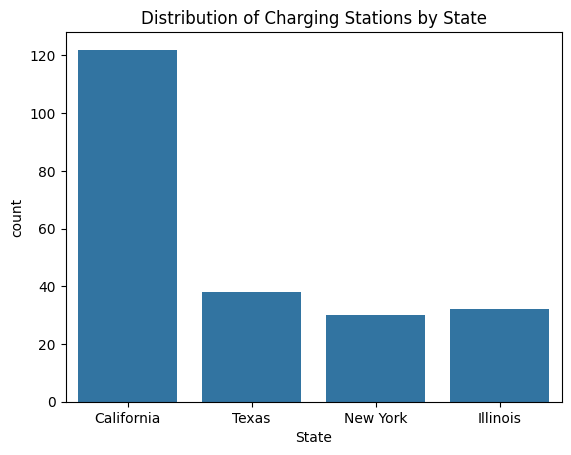

In [37]:
sns.countplot(x='State', data=better_location_df)
plt.title('Distribution of Charging Stations by State')
plt.show()

In [38]:
# Group by State and calculate the median Charging Duration
state_avg_duration = better_location_df.groupby('State')['Charging Duration (hours)'].median()
print(state_avg_duration)

State
California    2.308333
Illinois      2.491667
New York      2.000000
Texas         2.258333
Name: Charging Duration (hours), dtype: float64


In [39]:
# Count unique Charging Station IDs per state
station_counts_per_state = better_location_df.groupby('State')['Charging Station ID'].nunique()
print(station_counts_per_state)

State
California    73
Illinois      24
New York      23
Texas         26
Name: Charging Station ID, dtype: int64


In [40]:
# Group by charging station ID and calculate average energy consumed
station_utilization = better_location_df.groupby('Charging Station ID')['Energy Consumed (kWh)'].median()

# Identify underutilized stations (stations with below-average energy consumption)
median_consumption = station_utilization.median()
underutilized_stations = station_utilization[station_utilization < median_consumption]


print(underutilized_stations)
underutilized_stations.nunique()

Charging Station ID
Station_128    36.771276
Station_133    39.884270
Station_138     5.868319
Station_147    22.413848
Station_15     17.704737
                 ...    
Station_73     13.105812
Station_75     28.248510
Station_77     26.376077
Station_85     36.316230
Station_86     27.611631
Name: Energy Consumed (kWh), Length: 73, dtype: float64


73

In [41]:
underutilized_stations

Charging Station ID
Station_128    36.771276
Station_133    39.884270
Station_138     5.868319
Station_147    22.413848
Station_15     17.704737
                 ...    
Station_73     13.105812
Station_75     28.248510
Station_77     26.376077
Station_85     36.316230
Station_86     27.611631
Name: Energy Consumed (kWh), Length: 73, dtype: float64

In [42]:
pricing_analysis = better_location_df.groupby(['State', 'Time of Day'])['Charging Cost (USD)'].median()

print(pricing_analysis)

State       Time of Day
California  Afternoon      24.985691
            Evening        19.353986
            Morning        19.953806
            Night          21.932717
Illinois    Afternoon      19.915124
            Evening        17.504763
            Morning        17.620674
            Night          22.362933
New York    Afternoon      28.292940
            Evening        31.421538
            Morning        13.620213
            Night          19.111526
Texas       Afternoon      18.816995
            Evening        14.338234
            Morning        16.523471
            Night          13.374711
Name: Charging Cost (USD), dtype: float64


In [ ]:
#find difference in freq of use bw peak and non-peak hours
# peak hours like 7-9am and 6-8pm

better_location_df['Hour'] = better_location_df['Charging Start Time'].dt.hour

def categorise_peakhour(hour):
    if (7 <= hour <= 9) or (18 <= hour <= 20):
        return 'Peak'
    else:
        return 'Nonpeak'
    
#creating new column
better_location_df['Peak_Nonpeak'] = better_location_df['Hour'].apply(categorise_peakhour)


#show wrt state
# Assuming your data has a 'State' or 'Location' column
state_groups = better_location_df.groupby(['State', 'Peak_Nonpeak']).size().unstack(fill_value=0)

# fidnign difference
state_groups['Difference'] = state_groups['Peak'] - state_groups['Nonpeak']


# Group by 'State' and 'Peak_NonPeak' to get counts
state_groups = better_location_df.groupby(['State', 'Peak_Nonpeak']).size().unstack(fill_value=0)

# Calculate the difference between peak and non-peak
state_groups['Difference'] =  state_groups['Nonpeak'] - state_groups['Peak']

# Display the summary table
print(state_groups)


Peak_Nonpeak  Nonpeak  Peak  Difference
State                                  
California         85    37          48
Illinois           21    11          10
New York           24     6          18
Texas              33     5          28


C:\Users\Ysuns\AppData\Local\Temp\ipykernel_61968\2924382443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better_location_df['Hour'] = better_location_df['Charging Start Time'].dt.hour
C:\Users\Ysuns\AppData\Local\Temp\ipykernel_61968\2924382443.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better_location_df['Peak_Nonpeak'] = better_location_df['Hour'].apply(categorise_peakhour)


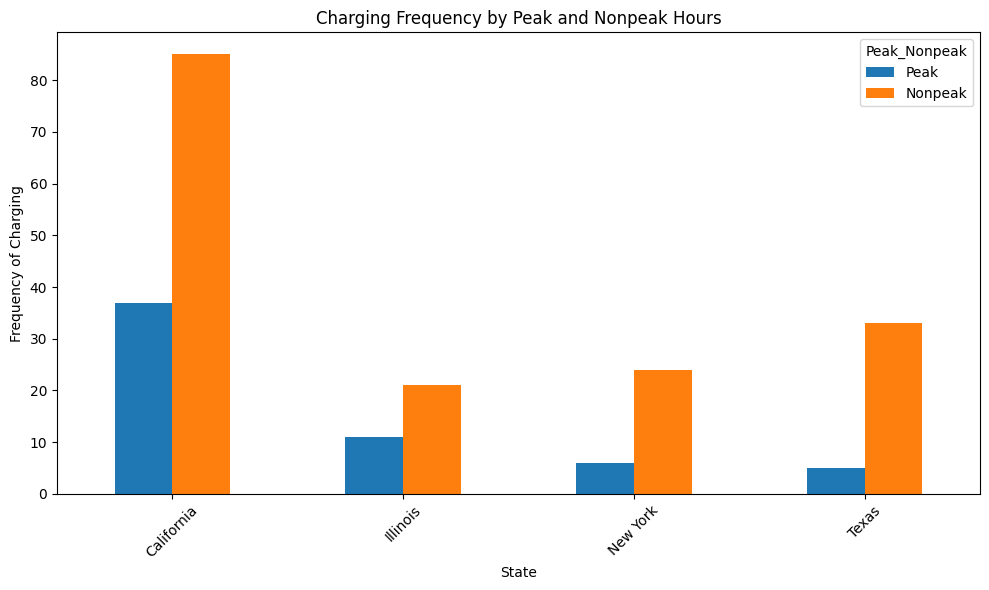

In [61]:
# Plot a grouped bar chart
state_groups[['Peak', 'Nonpeak']].plot(kind='bar', figsize=(10, 6))

plt.title('Charging Frequency by Peak and Nonpeak Hours')
plt.xlabel('State')
plt.ylabel('Frequency of Charging')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
# #Optimising memory by appling correct data types to features
# df = df.astype({
#     'User ID': 'str',
#     'Vehicle Model': 'category',
#     'Charging Station ID': 'str',
#     'Charging Station Location': 'category',
#     'Charging Start Time': 'datetime64[ns]',
#     'Charging End Time': 'datetime64[ns]',
#     'Time of Day': 'category',
#     'Day of Week': 'category',
#     'Charger Type': 'category',
#     'User Type': 'category'
# })

# print(df.dtypes)


# #Replace missing values with median
# df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']] = df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].fillna(df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].median())
# # df.isnull().sum()

In [45]:
# inconsistent_charge = df[df['State of Charge (Start %)'] > df['State of Charge (End %)']]
# df = df.drop(inconsistent_charge.index)
# print("Remaining rows after removing inconsistencies: ", len(df))

In [46]:
# mismatched_durations = df[
#     (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600 != df['Charging Duration (hours)']
# ]

# # Display the number of mismatched rows and their details
# print(f"Number of mismatched rows: {len(mismatched_durations)}")
# print(mismatched_durations[['Charging Start Time', 'Charging End Time', 'Charging Duration (hours)']])

In [47]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Select relevant features for clustering
# features = df[['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Cost (USD)']]
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # KMeans clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['Cluster'] = kmeans.fit_predict(scaled_features)

# # View the distribution of clusters
# print(df['Cluster'].value_counts())

# # Mean values of the features per cluster
# print(df.groupby('Cluster')[['Charging Duration (hours)', 'Energy Consumed (kWh)', 'Charging Cost (USD)']].mean())

# # Scatter plot of two features, color-coded by Cluster
# sns.scatterplot(data=df, x='Charging Duration (hours)', y='Energy Consumed (kWh)', hue='Cluster', palette='viridis')
# plt.title('Clustering of Charging Duration vs. Energy Consumed')
# plt.show()
